# 1. Entrainement k-NN sur des digits

In [ ]:
from sklearn.datasets import * ## chargement du package datasets contenant plusieurs jeu de données
import pandas as pd ## Chargement de Pandas
import matplotlib.pyplot as plt ## import de Matplotlib

from sklearn.model_selection import train_test_split ## classe utilitaire pour découper les jeux de données
from sklearn.neighbors import KNeighborsClassifier ## import de la classe de K-NN

In [ ]:
#Méthodes displayImage et plot_digits pour afficher des données images (méthode optionnelle)
def displayImage(i):
    plt.imshow(digit['images'][i], cmap='Greys_r')
    plt.show()


def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

In [ ]:
#Affichage de jeu de données 
digit = load_digits() # chargement du dataset MNIST
dig = pd.DataFrame(digit['data'][0:1700]) # Création d'un dataframe Panda
dig.head() # affiche le tableau ci-dessous

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


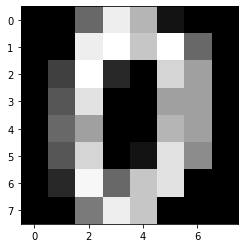

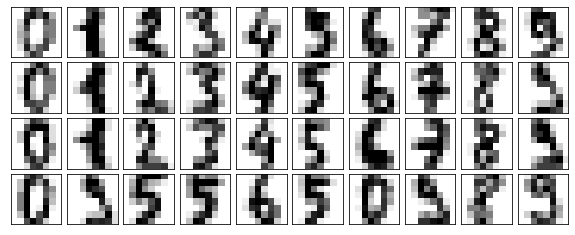

In [ ]:
displayImage(0) # affichage de la première image du jeu de données MNIST
plot_digits(digit.data)

In [ ]:
digit.keys()
train_x = digit.data
train_y = digit.target
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.25)

In [ ]:
KNN = KNeighborsClassifier(7)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
#la précision par rapport aux données de test
print(KNN.score(x_test,y_test))

0.9822222222222222


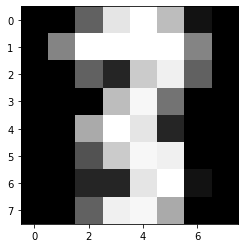

In [ ]:
#Afficher un élement de la matrice format image 
import numpy as np
test = np.array(digit['data'][1726])
test1 = test.reshape(1,-1)
displayImage(1726)

In [ ]:
#prédiction 
KNN.predict(test1)

array([3])

## Exercice

Renseignez-vous sur la classe KNeighborsClassifier de la bibliotheque scikitlearn. Testez des variations de paramètres : métrique, poids, algorithme. Gardez n_neighbors = 7. Affichez le score de chaque essai. Quel est le meilleur score que vous arrivez à atteindre ?

In [ ]:
KNN_NEW = KNeighborsClassifier(n_neighbors= 7, weights='uniform', algorithm='brute', p=2, metric='euclidean', metric_params=None, n_jobs=None)
KNN_NEW.fit(x_train, y_train)
print(KNN_NEW.score(x_test,y_test))

0.9822222222222222


In [ ]:
KNN_NEW2 = KNeighborsClassifier(n_neighbors= 7, weights='distance', algorithm='kd_tree', leaf_size= 32, p=2, metric='chebyshev', metric_params=None, n_jobs=None)
KNN_NEW2.fit(x_train, y_train)
print(KNN_NEW2.score(x_test,y_test))

0.9733333333333334


In [ ]:
KNN_NEW3 = KNeighborsClassifier(n_neighbors= 7, weights='distance', algorithm='ball_tree', leaf_size= 34, p=1, metric='manhattan', metric_params=None, n_jobs=None)
KNN_NEW3.fit(x_train, y_train)
print(KNN_NEW3.score(x_test,y_test))

0.9755555555555555


Je suis mais largué d'une force


## Ré-entrainement avec les nouveaux paramètres

In [ ]:
# Score avec les nouvelles tentatives
print(f'KNN_NEW Score: {KNN_NEW.score(x_test,y_test)} \nKNN_NEW2 Score: {KNN_NEW2.score(x_test,y_test)} \nKNN_NEW3 Score: {KNN_NEW3.score(x_test,y_test)}')

KNN_NEW Score: 0.9822222222222222 
KNN_NEW2 Score: 0.9733333333333334 
KNN_NEW3 Score: 0.9755555555555555


In [ ]:
# prediction avec jeu de train et jeu de test
KNN_NEW.predict(test1)
KNN_NEW2.predict(test1)
KNN_NEW3.predict(test1)

array([3])

## Curse of dimensionality -> Application d'une PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(digit.data) ## PCA avec 10 dimensions

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

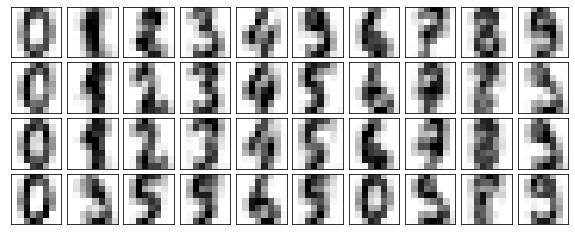

In [ ]:
components = pca.transform(digit.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Exercices

1. Faites une PCA à trois dimensions sur le jeu de données des digits et affichez-le.
2. Relancez un k-NN (k=7) sur les données simplifiées. Quelles sont les modifications ?
3. Modifiez la valeur de k, entre 2 et 12. Quels sont les résultats ?

## Définition d'une PCA à 3D


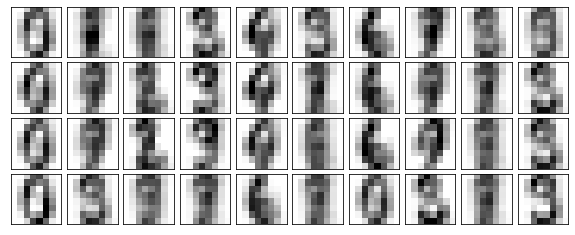

In [ ]:
pca_3D = PCA(n_components=3)
pca_3D.fit(digit.data)
components_3D = pca_3D.transform(digit.data)
filtered_3D = pca_3D.inverse_transform(components_3D)
plot_digits(filtered_3D)

In [ ]:
y = digit.target
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(components_3D,y,test_size=0.25)

In [ ]:
# relancement d'une classe KNN et création d'un tableau numpy
KNN = KNeighborsClassifier(7)
KNN.fit(x_train_2, y_train_2)
print(f'k : 7 score :{KNN.score(x_test_2,y_test_2)}')

k : 7 score :0.7511111111111111


In [ ]:
scores = []
for i in range(12):
  k = i+1
  KNN = KNeighborsClassifier(k)
  KNN.fit(x_train_2, y_train_2)
  score = KNN.score(x_test_2,y_test_2)
  scores.append(score)
  print(f'k : {k} score :{score}')

k : 1 score :0.7111111111111111
k : 2 score :0.6911111111111111
k : 3 score :0.7155555555555555
k : 4 score :0.7444444444444445
k : 5 score :0.7422222222222222
k : 6 score :0.7444444444444445
k : 7 score :0.7511111111111111
k : 8 score :0.7333333333333333
k : 9 score :0.7488888888888889
k : 10 score :0.7466666666666667
k : 11 score :0.7577777777777778
k : 12 score :0.7644444444444445


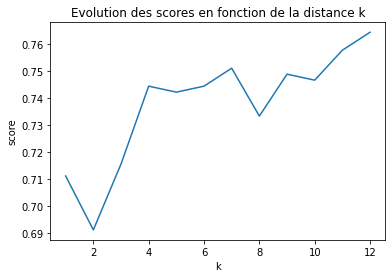

In [ ]:
ab = np.arange(1, 13, 1)

fig, ax = plt.subplots()
ax.plot(ab, scores)

ax.set(xlabel='k', ylabel='score',
       title='Evolution des scores en fonction de la distance k')

plt.show()

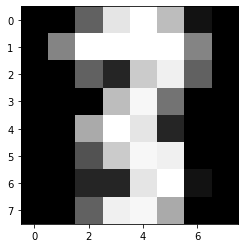

In [ ]:
test = np.array(digit['data'][1726])
test1 = test.reshape(1,-1)
displayImage(1726)

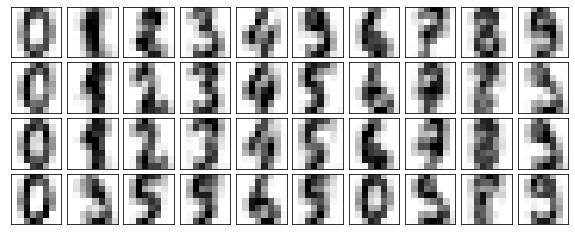

In [ ]:
plot_digits(filtered)

# 2. Arbres de décision / Random forests

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## 2.a Classification avec arbres de décision

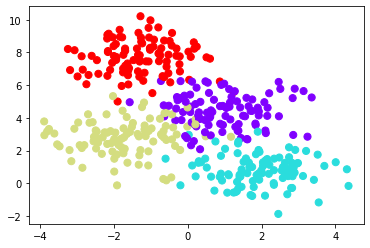

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

X1, y1 = make_blobs(n_samples=400, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='rainbow');

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
tree = classifier.fit(X1, y1)
y_pred = classifier.predict(X1)

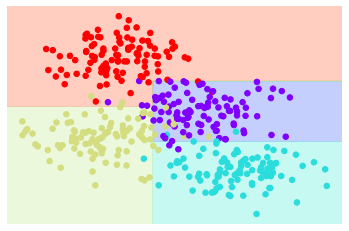

In [ ]:
visualize_classifier(classifier,X1,y1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error
print(confusion_matrix(y1, y_pred))
print(classification_report(y1, y_pred))

[[93  2  1  4]
 [ 2 97  1  0]
 [ 7  1 90  2]
 [ 2  0  0 98]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.97      0.97      0.97       100
           2       0.98      0.90      0.94       100
           3       0.94      0.98      0.96       100

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.95      0.94      0.95       400



## 2.b Régression avec arbres de décision

In [ ]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
petrol_data = pd.read_csv('petrol_consumption.csv')
petrol_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
X1 = petrol_data.drop('Petrol_Consumption', axis=1) ## x sont les variables / paramètres fixes
y1 = petrol_data['Petrol_Consumption'] ## y est la variable a deviner
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0) ## on divise nos données en 2 avec 20% de test
X1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train) ## on entraine le modele sur les données
y_pred = regressor.predict(X_test) ## on teste le modèle sur les données de test

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 51.3


### Exercice

Faites le même exercice en essayant de faire deviner la valeur de Average_Income avec respectivement 50%, 30% et 10% de données de test. Affichez l'erreur moyenne absolue dans chaque cas.

## Prédiction de la colonne Average par arbre de décision

In [ ]:
X2 = petrol_data.drop('Average_income', axis=1) ## x sont les variables / paramètres fixes
y2 = petrol_data['Average_income'] ## y est la variable a deviner
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=0) ## on divise nos données en 2 avec 20% de test
# X2.head()

X3 = petrol_data.drop('Average_income', axis=1) ## x sont les variables / paramètres fixes
y3 = petrol_data['Average_income'] ## y est la variable a deviner
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0) ## on divise nos données en 2 avec 20% de test
# X3.head()

X4 = petrol_data.drop('Average_income', axis=1) ## x sont les variables / paramètres fixes
y4 = petrol_data['Average_income'] ## y est la variable a deviner
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.1, random_state=0) ## on divise nos données en 2 avec 20% de test
# X4.head()

In [ ]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(X2_train, y2_train)
y2_pred = regressor2.predict(X2_test)

regressor3 = DecisionTreeRegressor()
regressor3.fit(X3_train, y3_train)
y3_pred = regressor3.predict(X3_test)

regressor4 = DecisionTreeRegressor()
regressor4.fit(X4_train, y4_train)
y4_pred = regressor4.predict(X4_test)

In [ ]:
df2=pd.DataFrame({'Actual':y2_test, 'Predicted':y2_pred})
df2
df3=pd.DataFrame({'Actual':y3_test, 'Predicted':y3_pred})
df3
df4=pd.DataFrame({'Actual':y4_test, 'Predicted':y4_pred})
df4
print(f'Mean Absolute Error for regression2: {mean_absolute_error(y2_test, y2_pred)}\nMean Absolute Error for regression2: {mean_absolute_error(y3_test, y3_pred)}\nMean Absolute Error for regression2: {mean_absolute_error(y4_test, y4_pred)}\n')

Mean Absolute Error for regression2: 592.4583333333334
Mean Absolute Error for regression2: 669.0666666666667
Mean Absolute Error for regression2: 769.2



## 2.c Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=400, centers=4,
                  random_state=0, cluster_std=1.0)

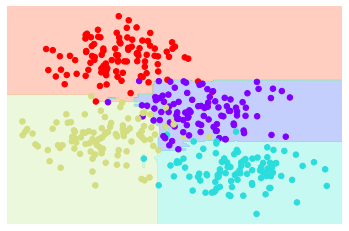

In [ ]:
visualize_classifier(model, X, y);

### Exercice

1. Affichez des indicateurs de réussite pour cette random forest (matrice de confusion, rapport de classification).
2. Utilisez une random forest pour entrainer un modèle sur les digits. Faites varier le nombre d'estimateurs entre 1 et 100. Le score change-t-il ?

## 1. Affichage d'indicateurs de réussite de la random forest

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error

tree_data = classifier.fit(X, y)
y_pred_forest = model.predict(X)

print(f'Confusion matrix:\n {confusion_matrix(y, y_pred_forest)}')
print(f'Classification:\n {classification_report(y, y_pred_forest)}')

Confusion matrix:
 [[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



## 2. Variation de prédiction pour les nombres en utilisant le random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_digit = RandomForestClassifier(n_estimators=80, random_state=0, max_depth=4)

#Affichage de jeu de données 
digit = load_digits() # chargement du dataset MNIST
dig = pd.DataFrame(digit['data'][0:1700]) # Création d'un dataframe Panda
dig.head() # affiche le tableau ci-dessous   

train_x_random = digit.data
train_y_random = digit.target
x_train_random,x_test_random,y_train_random,y_test_random = train_test_split(train_x_random,train_y_random,test_size=0.25)

model_digit.fit(train_x_random, train_y_random)
y_pred_forest_digit = model_digit.predict(train_x_random)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_digit2 = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=4)

#Affichage de jeu de données 
digit2 = load_digits() # chargement du dataset MNIST
dig2 = pd.DataFrame(digit['data'][0:1700]) # Création d'un dataframe Panda
dig2.head() # affiche le tableau ci-dessous   

train_x_random2 = digit.data
train_y_random2 = digit.target
x_train_random2,x_test_random2,y_train_random2,y_test_random2 = train_test_split(train_x_random2,train_y_random2,test_size=0.25)

model_digit2.fit(train_x_random, train_y_random)
y_pred_forest_digit2 = model_digit2.predict(train_x_random)

In [ ]:
print(f'Score: {model_digit.score(x_test_random, y_test_random)}\nScore 2: {model_digit2.score(x_test_random, y_test_random)}')


Score: 0.9222222222222223
Score 2: 0.9222222222222223


ValueError: ignored

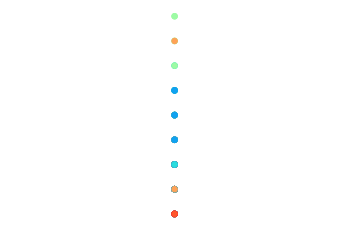

In [ ]:
# visualize_classifier(model_digit2, train_x_random2, train_y_random2)

In [ ]:
# on affiche les matrices de confusion  
print(f'Confusion matrix:\n {confusion_matrix(train_y_random, y_pred_forest_digit)}')
print(f'Classification:\n {classification_report(train_y_random, y_pred_forest_digit)}')
print(f'Confusion matrix:\n {confusion_matrix(train_y_random2, y_pred_forest_digit2)}')
print(f'Classification:\n {classification_report(train_y_random2, y_pred_forest_digit2)}')

Confusion matrix:
 [[176   0   0   0   2   0   0   0   0   0]
 [  0 159   7   2   1   1   2   0   0  10]
 [  0   2 172   2   0   0   0   0   0   1]
 [  1   0   3 168   0   2   0   2   7   0]
 [  0   0   0   0 176   1   0   4   0   0]
 [  0   0   0   0   1 168   1   0   1  11]
 [  1   0   0   0   2   0 178   0   0   0]
 [  0   0   0   0   2   1   0 176   0   0]
 [  1  10   5   3   0   2   1   5 141   6]
 [  0   1   0   4   1   5   0   9   1 159]]
Classification:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.92      0.87      0.90       182
           2       0.92      0.97      0.95       177
           3       0.94      0.92      0.93       183
           4       0.95      0.97      0.96       181
           5       0.93      0.92      0.93       182
           6       0.98      0.98      0.98       181
           7       0.90      0.98      0.94       179
           8       0.94      0.81      0.87   